In [316]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from isoweek import Week

In [317]:
# import data from CSV File
df_14_day_notification = pd.read_csv('./data/14-day notification_COVID19_data.csv')

In [318]:
def conter_yw_to_date(year_week):
    return Week(2020, 10).monday()

In [319]:
df_14_day_notification.tail()

,country,country_code,continent,population,indicator,weekly_count,year_week,rate_14_day,cumulative_count,source
40797,Zimbabwe,ZWE,Africa,14862927,deaths,9,2021-43,1.345630,4678,Epidemic intelligence national data
40798,Zimbabwe,ZWE,Africa,14862927,deaths,7,2021-44,1.076504,4685,Epidemic intelligence national data
40799,Zimbabwe,ZWE,Africa,14862927,deaths,12,2021-45,1.278348,4697,Epidemic intelligence national data
40800,Zimbabwe,ZWE,Africa,14862927,deaths,2,2021-46,0.941941,4699,Epidemic intelligence national data
40801,Zimbabwe,ZWE,Africa,14862927,deaths,6,2021-47,0.538252,4705,Epidemic intelligence national data


In [320]:
# get some usefull information about data
df_14_day_notification.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40802 entries, 0 to 40801
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           40802 non-null  object 
 1   country_code      39602 non-null  object 
 2   continent         40802 non-null  object 
 3   population        40802 non-null  int64  
 4   indicator         40802 non-null  object 
 5   weekly_count      40802 non-null  int64  
 6   year_week         40802 non-null  object 
 7   rate_14_day       40354 non-null  float64
 8   cumulative_count  40802 non-null  int64  
 9   source            40802 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 3.1+ MB


In [321]:
df_14_day_notification.shape

(40802, 10)

In [322]:
# get null data
df_14_day_notification.isnull().sum()

country                0
country_code        1200
continent              0
population             0
indicator              0
weekly_count           0
year_week              0
rate_14_day          448
cumulative_count       0
source                 0
dtype: int64

In [323]:
# clear null data
df_14_day_notification.dropna(inplace=True)

In [324]:
df_14_day_notification.shape

(39166, 10)

In [325]:
# test the data again
df_14_day_notification.isnull().sum()

country             0
country_code        0
continent           0
population          0
indicator           0
weekly_count        0
year_week           0
rate_14_day         0
cumulative_count    0
source              0
dtype: int64

In [326]:
df_cases = df_14_day_notification[df_14_day_notification['indicator'] == 'cases']

## COVID19 WORLD CASES

In [327]:
df_cases['weekly_count'].sum()

261809936

## COVID19 WORLD DEATHS

In [328]:
df_deaths = df_14_day_notification[df_14_day_notification['indicator'] == 'deaths']

In [329]:
df_deaths_per_continent = df.groupby(['continent', 'weekly_count']).agg('sum')

In [330]:
df_deaths_per_continent

population  rate_14_day  cumulative_count
continent weekly_count                                            
Africa    -148             12123198    -1.055827               191
          -15              45741000     0.198946               212
           0            37408081491  1489.512965           2247648
           1             9161466379   744.409290            184563
           2             6604827317  1113.604084            209812
...                             ...          ...               ...
Oceania    18539           42409508    84.730999            256736
           18826           42354311    81.299871            204271
           18972           42409508    94.561342            296839
           21131           42409508    93.540345            277867
           21610           42409508    95.690806            318449

[12617 rows x 3 columns]

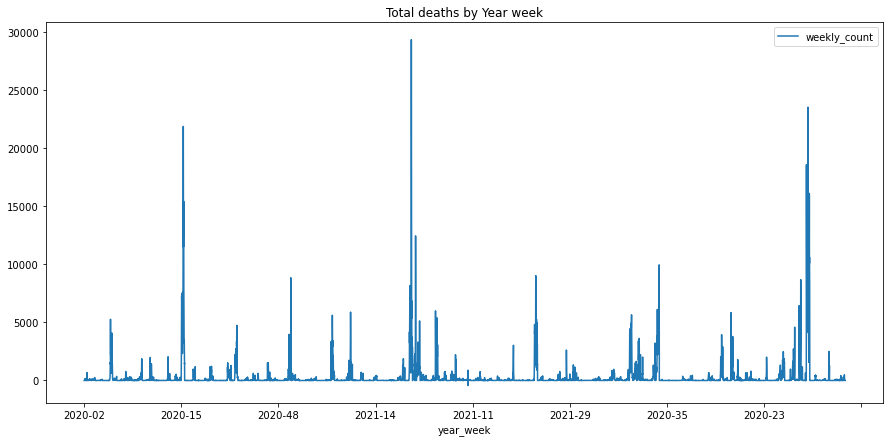

In [331]:
df_deaths.plot(x = 'year_week', y = 'weekly_count', figsize = (15,7), title = 'Total deaths by Year week');